In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
img_array = cv2.imread("C:\Major_Project\Train_Data\closed_eyes\s0001_00001_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

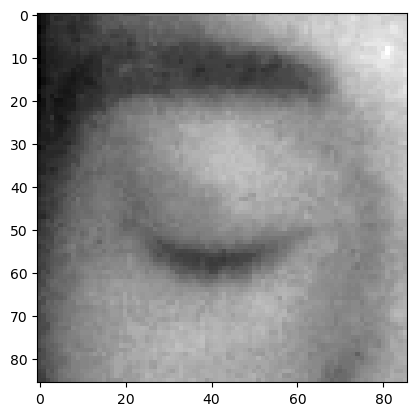

In [3]:

plt.imshow(img_array,cmap="gray")

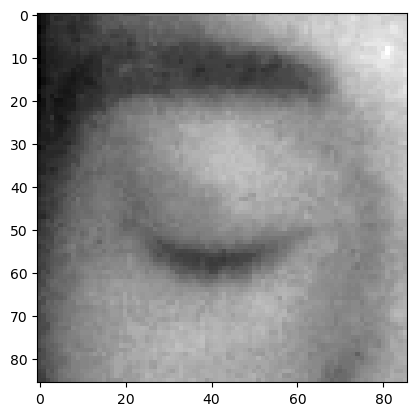

In [4]:



plt.imshow(img_array,cmap="gray")

In [5]:
img_array.shape

(86, 86)

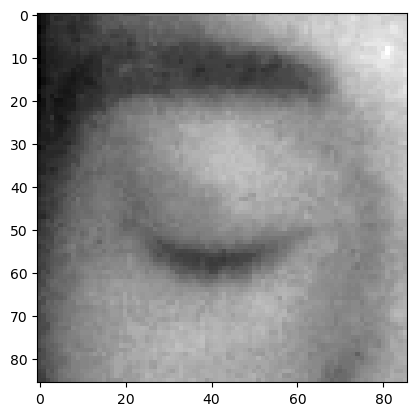

In [6]:
Datadirectory = "C:\\mrl_new"
Classes = ["closed_eyes","open_eyes"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

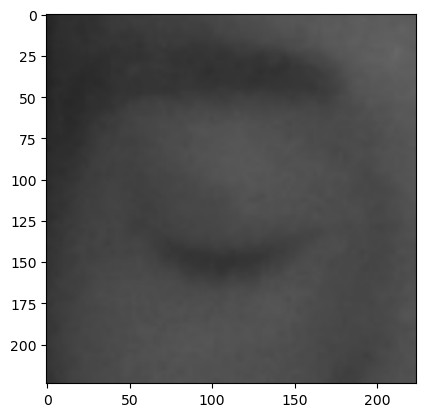

In [7]:
img_size = 224

new_array= cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [8]:
#reading all the images and converting them into an array for data and labels
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Execution as e:
                pass
        


In [9]:
create_training_Data()

In [10]:
print(len(training_Data))

1332


In [11]:
import random

random.shuffle(training_Data)

In [12]:
x = []
y = []

for features,label in training_Data:
    x.append(features)
    y.append(label)
    
X = np.array(x).reshape(-1, img_size, img_size, 3)


In [13]:
X.shape

(1332, 224, 224, 3)

In [14]:
#normalise the data

X = X/255.0;


In [15]:
Y = np.array(y) 

In [16]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [17]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
model = tf.keras.applications.mobilenet.MobileNet()

In [20]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [21]:

base_input = model.layers[0].input

In [22]:
base_output = model.layers[-4].output

In [23]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation("sigmoid")(final_output)

In [24]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [25]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [26]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [27]:
new_model.fit(X,Y, epochs = 1,validation_split = 0.1)

38/38 [==============================] - 183s 4s/step - loss: 0.2506 - accuracy: 0.9249 - val_loss: 0.5042 - val_accuracy: 0.7388


In [28]:
from tensorflow.keras.models import load_model

In [29]:
new_model.save("C:\\mrl_new\\cnnCat2.hdf5")

In [30]:
new_model = tf.keras.models.load_model("C:\\mrl_new\\cnnCat2.hdf5")

In [31]:
img_array = cv2.imread('C:\mrl_new\closed_eyes\s0001_00001_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(img_size,img_size))

In [32]:

X_input = np.array(new_array).reshape(1,img_size,img_size,3)

In [33]:
X_input.shape

(1, 224, 224, 3)

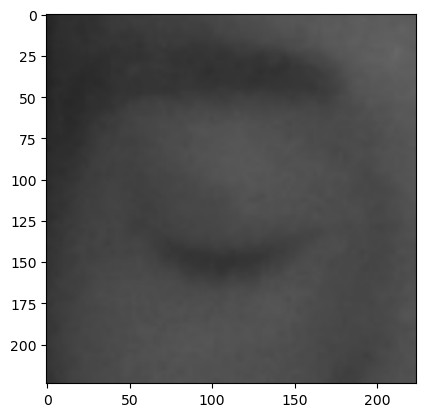

In [34]:

plt.imshow(new_array)

In [35]:



X_input = X_input/255.0

In [36]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 1s 1s/step


In [37]:
prediction

array([[0.06863121]], dtype=float32)

In [38]:
img = cv2.imread("C:\\Users\\LENOVO L380\\Downloads\\istockphoto-666991546-170667a.jpg")

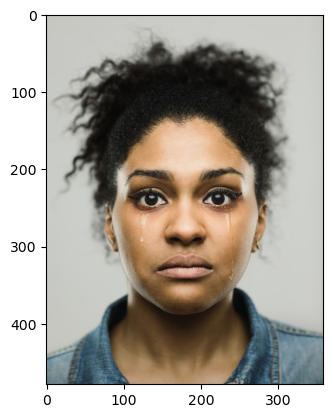

In [39]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [40]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [41]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

In [42]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [43]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [44]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)

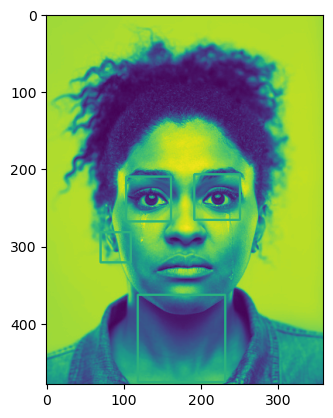

In [45]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))

In [46]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_eye.xml")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("Eyes are not Detected")
    else:
        for(ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]

Eyes are not Detected


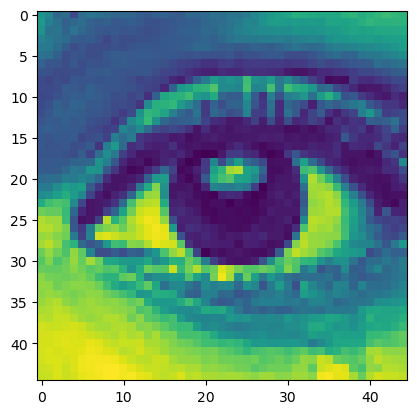

In [47]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2GRAY))

In [48]:
eyes_roi.shape

(45, 45, 3)

In [49]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/255.0

In [50]:
final_image.shape

(1, 224, 224, 3)

In [51]:
new_model.predict(final_image)

1/1 [==============================] - 0s 70ms/step


array([[0.97853917]], dtype=float32)

In [ ]:
import cv2
import winsound
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

cap = cv2.VideoCapture(0)
#check Webcam
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open webcam")
    
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255,0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not Detected")
        else:
            for(ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis = 0)
    final_image = final_image/255.0 
    
    Predictions = new_model.predict(final_image)
    if(Predictions > 0.95):
        status = 'open eye'
    else:
        status = 'Closed Eyes'
        frequency = 1000
        duration = 1000
        winsound.Beep(frequency,duration)
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    #Draw a rectangle around Face
    
    for(x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    #putText() method
    cv2.putText(frame,status,(50,50),font, 3,(0, 0, 255),2,cv2.LINE_4)
    cv2.imshow('FRAME',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()